### In this notebook we'll try to evaluate VGG thanks to our abstract engine

In [1]:
import sys
sys.path.append('../src')
sys.path.append('../src')
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision.models import vgg19
from abstractModule import AbstractLinear as AL
from abstractModule import AbstractReLU as AR
from abstractModule import AbstractMaxpool2D as AM
device=torch.device("cpu")
%load_ext autoreload
%autoreload 2

In [2]:
model = vgg19(pretrained=True)
model

/home/guillaume/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/guillaume/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [3]:
import torch
import torch.nn as nn

class CustomCNN(nn.Module):
    def __init__(self):
        super(CustomCNN, self).__init__()
        
        # Couches de convolution
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1)
        self.conv5 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.conv6 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1)
        self.conv7 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1)
        self.conv8 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1)
        self.conv9 = nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1)
        self.conv10 = nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1)
        self.conv11 = nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1)
        self.conv12 = nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1)
        self.conv13 = nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1)
        self.conv14 = nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1)
        self.conv15 = nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1)
        self.conv16 = nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1)
        
        # Couches de ReLU
        self.relu = nn.ReLU(inplace=True)
        
        # Couches de pooling
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Couches Fully Connected (FC)
        self.fc1 = nn.Sequential(
            nn.Flatten(),
            nn.Linear(25088, 4096),
        
        )
        
        self.fc2 = nn.Sequential(nn.Flatten(),
            nn.Linear(4096, 4096),
        )
        
        self.fc3 = nn.Sequential(nn.Flatten(),nn.Linear(4096, 1000))
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.relu(x)

        x = self.pool(x)
        
        x = self.conv3(x)
        x = self.relu(x) 
        x = self.conv4(x)
        x = self.relu(x)

        x = self.pool(x)

        x = self.conv5(x)
        x = self.relu(x)
        x = self.conv6(x)
        x = self.relu(x)
        x = self.conv7(x)
        x = self.relu(x)
        x = self.conv8(x)
        x = self.relu(x)

        x = self.pool(x)

        x = self.conv9(x)
        x = self.relu(x)
        x = self.conv10(x)
        x = self.relu(x)
        x = self.conv11(x)
        x = self.relu(x)
        x = self.conv12(x)
        x = self.relu(x)

        x = self.pool(x)

        x = self.conv13(x)
        x = self.relu(x)
        x = self.conv14(x)
        x = self.relu(x)
        x = self.conv15(x)
        x = self.relu(x)
        x = self.conv16(x)
        x = self.relu(x)

        x = self.pool(x)
        print(x.shape)

 
        
        
        # Fully Connected Layers
        x = self.fc1(x)
        x= self.relu(x)
        x = self.fc2(x)
        x= self.relu(x)
        x = self.fc3(x)
        x= self.relu(x)
     
        
        return x
    
    def abstract_forward(self,x,add_symbol=False,device=torch.device("cpu")):
        self.device=device
        
        x_true = x
        x_true = x_true[0].unsqueeze(0)

        x,x_min,x_max,x_true = AL.abstract_conv2D(self.conv1,x,x_true,device=self.device)
        x,x_min,x_max,x_true = AR.abstract_relu_conv2D(x,x_min,x_max,x_true,add_symbol=add_symbol,device =self.device)


        x,x_min,x_max,x_true = AL.abstract_conv2D(self.conv2,x,x_true,device=self.device)
        x,x_min,x_max,x_true = AR.abstract_relu_conv2D(x,x_min,x_max,x_true,add_symbol=add_symbol,device =self.device)
      

        x,x_min,x_max ,x_true = AM.abstract_maxpool2D(self.pool,x,x_true,add_symbol=add_symbol,device=self.device)
        
        x,x_min,x_max,x_true = AL.abstract_conv2D(self.conv3,x,x_true,device=self.device)
        x,x_min,x_max,x_true = AR.abstract_relu_conv2D(x,x_min,x_max,x_true,add_symbol=add_symbol,device =self.device)
      

        x,x_min,x_max,x_true = AL.abstract_conv2D(self.conv4,x,x_true,device=self.device)
        x,x_min,x_max,x_true = AR.abstract_relu_conv2D(x,x_min,x_max,x_true,add_symbol=add_symbol,device =self.device)
      


        x,x_min,x_max ,x_true = AM.abstract_maxpool2D(self.pool,x,x_true,add_symbol=add_symbol,device=self.device)

        x,x_min,x_max,x_true = AL.abstract_conv2D(self.conv5,x,x_true,device=self.device)
        x,x_min,x_max,x_true = AR.abstract_relu_conv2D(x,x_min,x_max,x_true,add_symbol=add_symbol,device =self.device)
      

        x,x_min,x_max,x_true = AL.abstract_conv2D(self.conv6,x,x_true,device=self.device)
        x,x_min,x_max,x_true = AR.abstract_relu_conv2D(x,x_min,x_max,x_true,add_symbol=add_symbol,device =self.device)
      

        
        x,x_min,x_max,x_true = AL.abstract_conv2D(self.conv7,x,x_true,device=self.device)
        x,x_min,x_max,x_true = AR.abstract_relu_conv2D(x,x_min,x_max,x_true,add_symbol=add_symbol,device =self.device)
      

        x,x_min,x_max,x_true = AL.abstract_conv2D(self.conv8,x,x_true,device=self.device)
        x,x_min,x_max,x_true = AR.abstract_relu_conv2D(x,x_min,x_max,x_true,add_symbol=add_symbol,device =self.device)
      


        x,x_min,x_max ,x_true = AM.abstract_maxpool2D(self.pool,x,x_true,add_symbol=add_symbol,device=self.device)

        x,x_min,x_max,x_true = AL.abstract_conv2D(self.conv9,x,x_true,device=self.device)
        x,x_min,x_max,x_true = AR.abstract_relu_conv2D(x,x_min,x_max,x_true,add_symbol=add_symbol,device =self.device)
      

        x,x_min,x_max,x_true = AL.abstract_conv2D(self.conv10,x,x_true,device=self.device)
        x,x_min,x_max,x_true = AR.abstract_relu_conv2D(x,x_min,x_max,x_true,add_symbol=add_symbol,device =self.device)
      

        x,x_min,x_max,x_true = AL.abstract_conv2D(self.conv11,x,x_true,device=self.device)
        x,x_min,x_max,x_true = AR.abstract_relu_conv2D(x,x_min,x_max,x_true,add_symbol=add_symbol,device =self.device)
      

        x,x_min,x_max,x_true = AL.abstract_conv2D(self.conv12,x,x_true,device=self.device)
        x,x_min,x_max,x_true = AR.abstract_relu_conv2D(x,x_min,x_max,x_true,add_symbol=add_symbol,device =self.device)
      


        x,x_min,x_max ,x_true = AM.abstract_maxpool2D(self.pool,x,x_true,add_symbol=add_symbol,device=self.device)

        x,x_min,x_max,x_true = AL.abstract_conv2D(self.conv13,x,x_true,device=self.device)
        x,x_min,x_max,x_true = AR.abstract_relu_conv2D(x,x_min,x_max,x_true,add_symbol=add_symbol,device =self.device)
      

        x,x_min,x_max,x_true = AL.abstract_conv2D(self.conv14,x,x_true,device=self.device)
        x,x_min,x_max,x_true = AR.abstract_relu_conv2D(x,x_min,x_max,x_true,add_symbol=add_symbol,device =self.device)
      

        x,x_min,x_max,x_true = AL.abstract_conv2D(self.conv15,x,x_true,device=self.device)
        x,x_min,x_max,x_true = AR.abstract_relu_conv2D(x,x_min,x_max,x_true,add_symbol=add_symbol,device =self.device)
      

        x,x_min,x_max,x_true = AL.abstract_conv2D(self.conv16,x,x_true,device=self.device)
        x,x_min,x_max,x_true = AR.abstract_relu_conv2D(x,x_min,x_max,x_true,add_symbol=add_symbol,device =self.device)
      


        x,x_min,x_max ,x_true = AM.abstract_maxpool2D(self.pool,x,x_true,add_symbol=add_symbol,device=self.device)

 
        
        
        # Fully Connected Layers
        x,x_min,x_max,x_true = AL.abstract_linear(self.fc1,x,x_true,device=self.device)
        x,x_min,x_max,x_true = AR.abstract_relu(x,x_min,x_max,x_true,add_symbol=add_symbol,device =self.device)
        
        x,x_min,x_max,x_true = AL.abstract_linear(self.fc2,x,x_true,device=self.device)
        x,x_min,x_max,x_true = AR.abstract_relu(x,x_min,x_max,x_true,add_symbol=add_symbol,device =self.device)
        
        
        x,x_min,x_max,x_true = AL.abstract_linear(self.fc3,x,x_true,device=self.device)
        x,x_min,x_max,x_true = AR.abstract_relu(x,x_min,x_max,x_true,add_symbol=add_symbol,device =self.device)
        return x,x_min,x_max,x_true


In [4]:
C=CustomCNN()


In [5]:
num_layer_C = 0
num_layer_model = 0
for param_1 in C.parameters():
    num_layer_C +=1

for param_2 in model.parameters():
    num_layer_model += 1
print(num_layer_C,num_layer_model)
for param_1, param_2 in zip(C.parameters(), model.parameters()):
    print(param_1.data.shape, param_2.data.shape)
    param_1.data = param_2.data

for param_1, param_2 in zip(C.parameters(), model.parameters()):

    print(torch.sum(param_1.data) -torch.sum(param_2.data))

38 38
torch.Size([64, 3, 3, 3]) torch.Size([64, 3, 3, 3])
torch.Size([64]) torch.Size([64])
torch.Size([64, 64, 3, 3]) torch.Size([64, 64, 3, 3])
torch.Size([64]) torch.Size([64])
torch.Size([128, 64, 3, 3]) torch.Size([128, 64, 3, 3])
torch.Size([128]) torch.Size([128])
torch.Size([128, 128, 3, 3]) torch.Size([128, 128, 3, 3])
torch.Size([128]) torch.Size([128])
torch.Size([256, 128, 3, 3]) torch.Size([256, 128, 3, 3])
torch.Size([256]) torch.Size([256])
torch.Size([256, 256, 3, 3]) torch.Size([256, 256, 3, 3])
torch.Size([256]) torch.Size([256])
torch.Size([256, 256, 3, 3]) torch.Size([256, 256, 3, 3])
torch.Size([256]) torch.Size([256])
torch.Size([256, 256, 3, 3]) torch.Size([256, 256, 3, 3])
torch.Size([256]) torch.Size([256])
torch.Size([512, 256, 3, 3]) torch.Size([512, 256, 3, 3])
torch.Size([512]) torch.Size([512])
torch.Size([512, 512, 3, 3]) torch.Size([512, 512, 3, 3])
torch.Size([512]) torch.Size([512])
torch.Size([512, 512, 3, 3]) torch.Size([512, 512, 3, 3])
torch.Size([

In [6]:
C.eval()
model.eval()
with torch.no_grad():
    x=torch.randn(1,3,224,224)
    print(torch.sum(C(x.detach())-model(x.detach())))

torch.Size([1, 512, 7, 7])
tensor(595.9182)


torch.Size([1, 3, 224, 224])


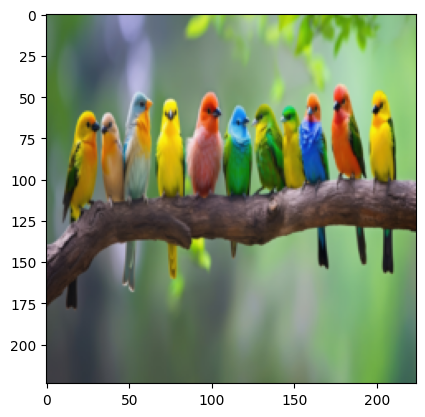

In [7]:
from PIL import Image
import torch
import torchvision.transforms as transforms

image = Image.open("../images/oiseaux.jpeg")

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])
image_tensor = transform(image)

image_tensor = image_tensor.unsqueeze(0)
print(image_tensor.size())
import matplotlib.pyplot as plt
plt.imshow(image_tensor[0].permute(1, 2, 0))

In [8]:
dim_abstract=200
alpha_value = 0.0005
span =torch.max(image_tensor)-torch.min(image_tensor)
print(f"span={span}")
from abstract import abstractTensor as AT 

x=AT(image_tensor.squeeze(0),alpha=alpha_value*span*torch.ones(dim_abstract)).abstract_tensor()

span=0.9725490212440491


In [9]:

x=x.to(device)
C.eval()

with torch.no_grad():
   result,x_min,x_max,x_true= C.abstract_forward(x.detach(),add_symbol=True,device=device)



x.shape=torch.Size([202, 3, 224, 224])
x.shape=torch.Size([204, 64, 224, 224])
x.shape=torch.Size([243, 64, 224, 224])
x.shape=torch.Size([243, 64, 224, 224])
x.shape=torch.Size([243, 64, 224, 224])
x.shape=torch.Size([243, 64, 224, 224])
x.shape=torch.Size([429, 64, 112, 112])
x.shape=torch.Size([464, 128, 112, 112])
x.shape=torch.Size([515, 128, 112, 112])
x.shape=torch.Size([515, 128, 112, 112])
x.shape=torch.Size([515, 128, 112, 112])
x.shape=torch.Size([515, 128, 112, 112])
x.shape=torch.Size([603, 128, 56, 56])
x.shape=torch.Size([629, 256, 56, 56])
x.shape=torch.Size([663, 256, 56, 56])
x.shape=torch.Size([698, 256, 56, 56])
x.shape=torch.Size([730, 256, 56, 56])
x.shape=torch.Size([730, 256, 56, 56])
x.shape=torch.Size([730, 256, 56, 56])
x.shape=torch.Size([730, 256, 56, 56])
x.shape=torch.Size([753, 256, 28, 28])
x.shape=torch.Size([769, 512, 28, 28])
x.shape=torch.Size([794, 512, 28, 28])
x.shape=torch.Size([821, 512, 28, 28])
x.shape=torch.Size([840, 512, 28, 28])
x.shape=t

In [15]:
_ , index = torch.topk(result[0], 9)

print(index)
print(f"Evaluation effectuée sur VGG19, sur un domaine abstrait comportant {dim_abstract} symboles, avec un alpha de {alpha_value}.")
print(f"l'évaluation a généré {len(result)-2-dim_abstract} symboles de bruits.")

import json
with open("VGG_index/imagenet_class_index.json") as f:
    class_idx = json.load(f)
idx2label = [class_idx[str(k)][1] for k in range(len(class_idx))]

print("Les 8 classes les plus probables sont :")
print([idx2label[i] for i in index])

print(f"y_min       =  {x_min[index]}")
print(f"y_max       =  {x_max[index]}")
print(f"center Ztp  =  {result[0][index]}")
print(f"y_true      =  {x_true.squeeze(0)[index]}")
print(f"y_max-x_min =  {x_max[index]-x_min[index]}")
print(f"Trash symbol=  {result[-1][index]}")

tensor([794,  29, 395, 912, 108, 389, 144, 394, 702])
Evaluation effectuée sur VGG19, sur un domaine abstrait comportant 200 symboles, avec un alpha de 0.0005.
l'évaluation a généré 712 symboles de bruits.
Les 8 classes les plus probables sont :
['shower_curtain', 'axolotl', 'gar', 'worm_fence', 'sea_anemone', 'barracouta', 'pelican', 'sturgeon', 'parallel_bars']
y_min       =  tensor([7.1918, 5.8493, 5.5920, 5.5043, 5.3646, 4.8845, 4.8463, 4.8323, 4.7674])
y_max       =  tensor([7.1934, 5.8511, 5.5937, 5.5056, 5.3661, 4.8855, 4.8475, 4.8341, 4.7696])
center Ztp  =  tensor([7.1926, 5.8502, 5.5928, 5.5050, 5.3653, 4.8850, 4.8469, 4.8332, 4.7685])
y_true      =  tensor([7.1926, 5.8502, 5.5928, 5.5050, 5.3653, 4.8850, 4.8469, 4.8332, 4.7685])
y_max-x_min =  tensor([0.0017, 0.0018, 0.0017, 0.0013, 0.0015, 0.0010, 0.0012, 0.0018, 0.0021])
Trash symbol=  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.])


In [18]:
model.eval()
res =model(image_tensor)
_ , index = torch.topk(res, 8)
print(index)

tensor([[794,  29, 395, 912, 108, 389, 144, 394]])


In [19]:
import json
with open("VGG_index/imagenet_class_index.json") as f:
    class_idx = json.load(f)
idx2label = [class_idx[str(k)][1] for k in range(len(class_idx))]

print("Les 8 classes les plus probables sont :")
print([idx2label[i] for i in index[0]])

Les 8 classes les plus probables sont :
['shower_curtain', 'axolotl', 'gar', 'worm_fence', 'sea_anemone', 'barracouta', 'pelican', 'sturgeon']
